In [1]:
print("selected dataset: ML-EdgeIIoT-dataset.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selected dataset: ML-EdgeIIoT-dataset.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-EdgeIIoT-dataset (1).csv", low_memory = False)
df.head()

In [ ]:
print(df["ip.src_host"])

In [ ]:
# Checking the invalid ipaddresses
import ipaddress
def inval_ip(ip_address):
  # if ip_address == "0.0": ip_address = "0.0.0.0"
  try :
    if int(ipaddress.IPv4Address(ip_address)):
      return True
    return False
  except:
    return False
df["ip.src_check"] = df["ip.src_host"]
df["ip.src_check"].apply(inval_ip)

In [ ]:
# Converting the ip.src_host to int

def ip_to_int(ip_address):
  # if ip_address == "0.0": ip_address = "0.0.0.0"
  try:
    return int(ipaddress.IPv4Address(ip_address))
  except:
    return 0

df["ip.src_host"] = df["ip.src_host"].apply(ip_to_int)
df["ip.src_host"]

In [ ]:
df["ip.dst_host"] = df["ip.dst_host"].apply(ip_to_int)
df["ip.dst_host"]

In [ ]:
zeros = 0
for row in df["ip.dst_host"]:
    if row == 0: zeros += 1
print(zeros)

In [ ]:
df["ip.src_host"].nunique()

In [ ]:
df_labels_based = df.drop("Attack_label", axis = 1)
df_type_based = df.drop("Attack_type", axis = 1)

In [ ]:
print(df_labels_based)
print(df_type_based)

In [ ]:
df.isnull().sum()

In [ ]:
# Counting the unique values for each columns
for col in df.columns:
  df[col].nunique
  print(col, df[col].nunique())

In [ ]:
df

In [ ]:
# handling frame.time
# df["frame.time"] = pd.to_datetime(df["frame.time"])
print(df["frame.time"].unique())

Handling the frame.time

In [3]:
# parallel execution using dask
! pip install dask[dataframe]
import dask.dataframe as dd

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   -- ------------------------------------- 1.8/25.1 MB 9.1 MB/s eta 0:00:03
   ----- ---------------------------------- 3.4/25.1 MB 8.8 MB/s eta 0:00:03
   -------- ------------------------------- 5.2/25.1 MB 8.4 MB/s eta 0:00:03
   ----------- ---------------------------- 7.1/25.1 MB 8.6 MB/s eta 0:00:03
   -------------- ------------------------- 8.9/25.1 MB 8.4 MB/s eta 0:00:02
   ----------------- ---------------------- 10.7/25.1 MB 8.5 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/25.1 MB 8.4 MB/s eta 0:00:02
   ---------------------- ----------------- 14.2/25.1 MB 8.4 MB/s eta 0:00:02
   ------------------------- -------------- 16.0/25.1 

In [4]:
ddf = dd.from_pandas(df, npartitions = 4)
ddf.head()

NameError: name 'df' is not defined

In [ ]:
def handle_frame(row):
  try:
    row = pd.to_datetime(row, format = "%Y %H:%M:%S.%f")
    return row
  except ValueError:
    try:
      return pd.to_datetime(row)
    except:
      return pd.NaT
meta = pd.Series(pd.to_datetime([]), name = "frame.time")
ddf["frame.time"] = ddf["frame.time"].apply(handle_frame, meta = meta).compute()

In [ ]:
# convert dask dataframe to pandas dataframe
df = ddf.compute()
df["frame.time"]

In [43]:
df["frame.time"].dropna(inplace = True)
df["frame.time"]

,frame.time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
157795,NaN
157796,NaN
157797,NaN
157798,NaN


In [ ]:
df.columns.nunique()

64

In [ ]:
df.isna().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
ip.src_check          0
Length: 64, dtype: int64

In [ ]:
print(df["Attack_label"].value_counts())
print(df["Attack_type"].value_counts())
print(df["Attack_type"].nunique())

Attack_label
1    133499
0     24301
Name: count, dtype: int64
Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: count, dtype: int64
15


In [ ]:
# checking columns with the 0.0 value in each row
def zero_col(df):
  for col in df.columns:
    if (df[col] == 0.0).all():
      print(col)
zero_col(df)

icmp.unused
http.tls_port
dns.qry.type
dns.retransmit_request_in
mqtt.msg_decoded_as
mbtcp.len
mbtcp.trans_id
mbtcp.unit_id


In [ ]:
# droping the columns containing only 0.0 in each rows
list = ["icmp.unused",
        "http.tls_port",
        "dns.qry.type",
        "dns.retransmit_request_in",
        "mqtt.msg_decoded_as",
        "mbtcp.len",
        "mbtcp.trans_id",
        "mbtcp.unit_id"]
df.drop(list, axis = 1, inplace = True)
print(df.columns.nunique())

56


In [ ]:
df.dtypes

frame.time                  object
ip.src_host                  int64
ip.dst_host                  int64
arp.dst.proto_ipv4          object
arp.opcode                 float64
arp.hw.size                float64
arp.src.proto_ipv4          object
icmp.checksum              float64
icmp.seq_le                float64
icmp.transmit_timestamp    float64
http.file_data              object
http.content_length        float64
http.request.uri.query      object
http.request.method         object
http.referer                object
http.request.full_uri       object
http.request.version        object
http.response              float64
tcp.ack                    float64
tcp.ack_raw                float64
tcp.checksum               float64
tcp.connection.fin         float64
tcp.connection.rst         float64
tcp.connection.syn         float64
tcp.connection.synack      float64
tcp.dstport                float64
tcp.flags                  float64
tcp.flags.ack              float64
tcp.len             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 56 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   frame.time               157800 non-null  object 
 1   ip.src_host              157800 non-null  int64  
 2   ip.dst_host              157800 non-null  int64  
 3   arp.dst.proto_ipv4       157800 non-null  object 
 4   arp.opcode               157800 non-null  float64
 5   arp.hw.size              157800 non-null  float64
 6   arp.src.proto_ipv4       157800 non-null  object 
 7   icmp.checksum            157800 non-null  float64
 8   icmp.seq_le              157800 non-null  float64
 9   icmp.transmit_timestamp  157800 non-null  float64
 10  http.file_data           157800 non-null  object 
 11  http.content_length      157800 non-null  float64
 12  http.request.uri.query   157800 non-null  object 
 13  http.request.method      157800 non-null  object 
 14  http

In [ ]:
df[df.duplicated()].columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'http.file_data',
       'http.content_length', 'http.request.uri.query', 'http.request.method',
       'http.referer', 'http.request.full_uri', 'http.request.version',
       'http.response', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum',
       'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn',
       'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack',
       'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport',
       'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name',
       'dns.qry.name.len', 'dns.qry.qu', 'dns.retransmission',
       'dns.retransmit_request', 'mqtt.conack.flags', 'mqtt.conflag.cleansess',
       'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.topi

In [ ]:
df.drop_duplicates(inplace = True)


In [ ]:
df.shape

(156986, 56)

In [ ]:
print(df.select_dtypes(include = "object").columns)

Index(['frame.time', 'arp.dst.proto_ipv4', 'arp.src.proto_ipv4',
       'http.file_data', 'http.request.uri.query', 'http.request.method',
       'http.referer', 'http.request.full_uri', 'http.request.version',
       'tcp.options', 'tcp.payload', 'tcp.srcport', 'dns.qry.name.len',
       'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic',
       'Attack_type', 'ip.src_check'],
      dtype='object')


In [ ]:
print(df.select_dtypes(include = ["float64", "int64"]).columns)

Index(['ip.src_host', 'ip.dst_host', 'arp.opcode', 'arp.hw.size',
       'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp',
       'http.content_length', 'http.response', 'tcp.ack', 'tcp.ack_raw',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port',
       'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu',
       'dns.retransmission', 'dns.retransmit_request',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver',
       'Attack_label'],
      dtype='object')


In [ ]:
cat_cols = ['http.request.method', 'http.referer', 'http.request.version',
       'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.protoname', 'mqtt.topic',
       'Attack_type']

In [ ]:
for col in cat_cols:
  df[col] = df[col].astype("category")
print(df.dtypes)

frame.time                   object
ip.src_host                   int64
ip.dst_host                   int64
arp.dst.proto_ipv4           object
arp.opcode                  float64
arp.hw.size                 float64
arp.src.proto_ipv4           object
icmp.checksum               float64
icmp.seq_le                 float64
icmp.transmit_timestamp     float64
http.file_data               object
http.content_length         float64
http.request.uri.query       object
http.request.method        category
http.referer               category
http.request.full_uri        object
http.request.version       category
http.response               float64
tcp.ack                     float64
tcp.ack_raw                 float64
tcp.checksum                float64
tcp.connection.fin          float64
tcp.connection.rst          float64
tcp.connection.syn          float64
tcp.connection.synack       float64
tcp.dstport                 float64
tcp.flags                   float64
tcp.flags.ack               

In [ ]:
# working one the categorical columns
for col in cat_cols:
  print(df[col])
  print(df[col].value_counts())

0         0.0
1         0.0
8         0.0
29        0.0
30        0.0
         ... 
157795    0.0
157796    0.0
157797    0.0
157798    0.0
157799    0.0
Name: http.request.method, Length: 156986, dtype: category
Categories (6, object): ['0', '0.0', 'GET', 'OPTIONS', 'POST', 'TRACE']
http.request.method
0.0        95728
0          54062
GET         6676
POST         267
TRACE        252
OPTIONS        1
Name: count, dtype: int64
0         0.0
1         0.0
8         0.0
29        0.0
30        0.0
         ... 
157795    0.0
157796    0.0
157797    0.0
157798    0.0
157799    0.0
Name: http.referer, Length: 156986, dtype: category
Categories (4, object): ['() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6..., '0', '0.0', '127.0.0.1']
http.referer
0.0                                                                     126297
0                                                                        30399
127.0.0.1                                                                  252
() { _; } 

In [ ]:
# Encoding the categorical columns
for col in cat_cols:
  df[col] = df[col].cat.codes
print(df.dtypes)


frame.time                  object
ip.src_host                  int64
ip.dst_host                  int64
arp.dst.proto_ipv4          object
arp.opcode                 float64
arp.hw.size                float64
arp.src.proto_ipv4          object
icmp.checksum              float64
icmp.seq_le                float64
icmp.transmit_timestamp    float64
http.file_data              object
http.content_length        float64
http.request.uri.query      object
http.request.method           int8
http.referer                  int8
http.request.full_uri       object
http.request.version          int8
http.response              float64
tcp.ack                    float64
tcp.ack_raw                float64
tcp.checksum               float64
tcp.connection.fin         float64
tcp.connection.rst         float64
tcp.connection.syn         float64
tcp.connection.synack      float64
tcp.dstport                float64
tcp.flags                  float64
tcp.flags.ack              float64
tcp.len             

# Visualization

C:\Users\nitin\AppData\Local\Temp\ipykernel_2256\7317570.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_srcs.index, rotation = 90)
C:\Users\nitin\AppData\Local\Temp\ipykernel_2256\7317570.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_dsts.index, rotation = 90)


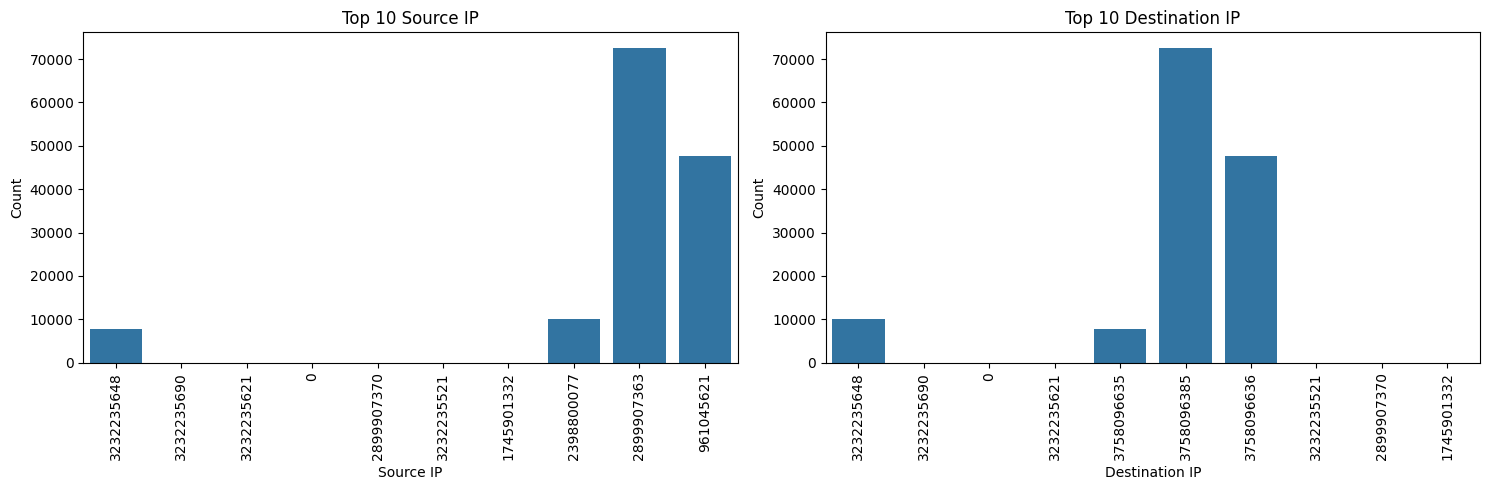

In [ ]:
# top sources
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
top_srcs = df["ip.src_host"].value_counts().head(10)
sns.barplot(x = top_srcs.index, y = top_srcs, ax = axes[0])
axes[0].set_xticklabels(top_srcs.index, rotation = 90)
axes[0].set_xlabel("Source IP")
axes[0].set_ylabel("Count")
axes[0].set_title("Top 10 Source IP")

# top destinations
top_dsts = df["ip.dst_host"].value_counts().head(10)
sns.barplot(x = top_dsts.index, y = top_srcs, ax = axes[1])
axes[1].set_xticklabels(top_dsts.index, rotation = 90)
axes[1].set_xlabel("Destination IP")
axes[1].set_ylabel("Count")
axes[1].set_title("Top 10 Destination IP")
plt.tight_layout()
plt.show()

In [ ]:
numerical_df = df.select_dtypes(include = ["float64", "int64"])
numerical_df.corr()["Attack_label"].sort_values(ascending = False).head()

Attack_label     1.000000
ip.src_host      0.134241
icmp.seq_le      0.121905
icmp.checksum    0.117346
udp.stream       0.110884
Name: Attack_label, dtype: float64

<Axes: >

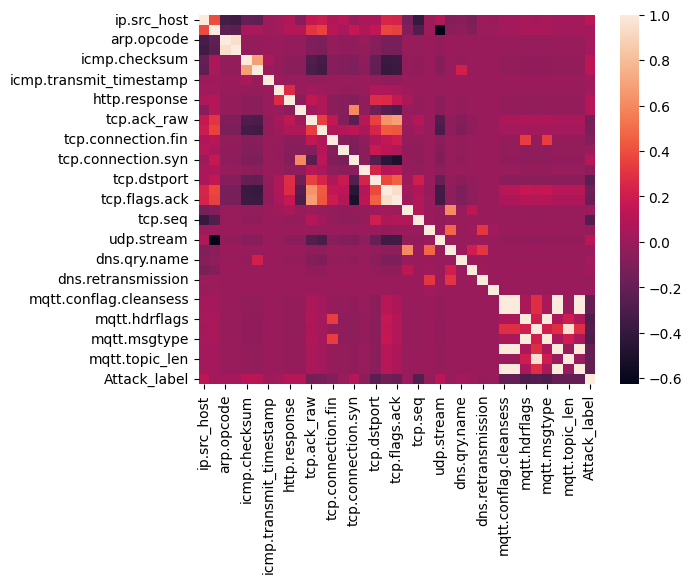

In [ ]:
sns.heatmap(numerical_df.corr())

# Machine Learning Algo application

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
numerical_df

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
0,3232235672,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3232235621,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,3247985195,3232235648,0.0,0.0,48729.0,40690.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
157796,4248043989,3232235648,0.0,0.0,45657.0,40702.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
157797,1805376817,3232235648,0.0,0.0,57686.0,41423.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
157798,1307720420,3232235648,0.0,0.0,9555.0,42379.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = numerical_df.drop(["Attack_label"], axis = 1).sample(10000)
y = numerical_df["Attack_label"].sample(10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver = "liblinear")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
# models.append(("SVC", SVC(gamma = "auto")))
print("Models are: ")
for name, model in models:
  print( name)
print(models)
names = []
results = {}
eval_scores = []
for name, model in models:
  print(name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1] # probabilities of all positive 1-labeled columns
  kfold_ = KFold(n_splits = 10, random_state = 10, shuffle = True)
  names.append(name)
  results = {
      "Model Name": name,
      "accuracy_score": accuracy_score(y_test, y_pred),
      "recall": recall_score(y_test, y_pred),
      "f1_score": f1_score(y_test, y_pred),
      "roc_auc_score": roc_auc_score(y_test, y_proba),
      "confusion_metrix": confusion_matrix(y_test, y_pred),
      "cross_val_score": cross_val_score(model, X, y, scoring = "accuracy", cv = kfold_).mean()
  }
  eval_scores.append(results)
  # results_mean.append(cv_results.mean())
  # msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
  # print(msg)
print(eval_scores)

Models are: 
LR
LDA
KNN
CART
NB
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB())]
LR
LDA
KNN
CART
NB
[{'Model Name': 'LR', 'accuracy_score': 0.836, 'recall': 0.9976119402985074, 'f1_score': 0.9106267029972752, 'roc_auc_score': 0.5065625717566016, 'confusion_metrix': array([[   1,  324],
       [   4, 1671]], dtype=int64), 'cross_val_score': 0.8388}, {'Model Name': 'LDA', 'accuracy_score': 0.8375, 'recall': 1.0, 'f1_score': 0.9115646258503401, 'roc_auc_score': 0.4944587830080367, 'confusion_metrix': array([[   0,  325],
       [   0, 1675]], dtype=int64), 'cross_val_score': 0.8406}, {'Model Name': 'KNN', 'accuracy_score': 0.8215, 'recall': 0.9749253731343284, 'f1_score': 0.9014628760695557, 'roc_auc_score': 0.48088358208955223, 'confusion_metrix': array([[  10,  315],
       [  42, 1633]], dtype=int64), 'cross_val_score': 0.8170999999999999}, {'Model Name': 'C

In [ ]:
# Prediction for the multiclass columns df
X = df.drop(["Attack_type", "Attack_label", "ip.src_check"], axis = 1)
y = df["Attack_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
X

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver
0,6.0,3232235672,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
1,6.0,3232235621,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
8,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
29,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
30,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,3247985195,3232235648,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
157796,2021 23:24:32.699354000,4248043989,3232235648,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
157797,2021 23:24:32.719931000,1805376817,3232235648,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0
157798,2021 23:24:32.752054000,1307720420,3232235648,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0


In [ ]:
models = []
models.append(("LR", LogisticRegression(solver = "liblinear")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
# models.append(("SVC", SVC(gamma = "auto")))
print("Models are: ")
for name, model in models:
  print( name)
print(models)
names = []
results = {}
eval_scores = []
for name, model in models:
  print(name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1] # probabilities of all positive 1-labeled columns
  kfold_ = KFold(n_splits = 10, random_state = 10, shuffle = True)
  names.append(name)
  results = {
      "Model Name": name,
      "accuracy_score": accuracy_score(y_test, y_pred),
      "recall": recall_score(y_test, y_pred),
      "f1_score": f1_score(y_test, y_pred),
      "roc_auc_score": roc_auc_score(y_test, y_proba),
      "confusion_metrix": confusion_matrix(y_test, y_pred),
      "cross_val_score": cross_val_score(model, X, y, scoring = "accuracy", cv = kfold_).mean()
  }
  eval_scores.append(results)
  # results_mean.append(cv_results.mean())
  # msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
  # print(msg)
print(eval_scores)

Models are: 
LR
LDA
KNN
CART
NB
[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB())]
LR


ValueError: could not convert string to float: ' 2021 23:37:25.247814000 '